In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
df = pd.read_csv('../data/Week1_challenge_data_source(CSV).csv', na_values=['?', None, 'undefined'])
df.head()

Bearer Id            Start  Start ms              End  \
0 13,114,483,460,844,900,352.00   4/4/2019 12:01    770.00  4/25/2019 14:35   
1 13,114,483,482,878,900,224.00   4/9/2019 13:04    235.00   4/25/2019 8:15   
2 13,114,483,484,080,500,736.00   4/9/2019 17:42      1.00  4/25/2019 11:58   
3 13,114,483,485,442,799,616.00   4/10/2019 0:31    486.00   4/25/2019 7:36   
4 13,114,483,499,480,700,928.00  4/12/2019 20:10    565.00  4/25/2019 10:40   

   End ms    Dur. (ms)                   IMSI     MSISDN/Number  \
0  662.00 1,823,652.00 208,201,448,079,117.00 33,664,962,239.00   
1  606.00 1,365,104.00 208,201,909,211,140.00 33,681,854,413.00   
2  652.00 1,361,762.00 208,200,314,458,056.00 33,760,627,129.00   
3  171.00 1,321,509.00 208,201,402,342,131.00 33,750,343,200.00   
4  954.00 1,089,009.00 208,201,401,415,120.00 33,699,795,932.00   

                   IMEI     Last Location Name  Avg RTT DL (ms)  \
0 35,521,209,507,511.00  9.16456699548519E+015            42.00   
1 35,794,009,006,359.00                L77566A            65.00   
2 35,281,510,359,387.00                D42335A              NaN   
3 35,356,610,164,913.00                T21824A              NaN   
4 35,407,009,745,539.00                D88865A              NaN   

   Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0             5.00                    23.00                    44.00   
1             5.00                    16.00                    26.00   
2              NaN                     6.00                     9.00   
3              NaN                    44.00                    44.00   
4              NaN                     6.00                     9.00   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          NaN                          NaN   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0               100.00                            0.00   
1               100.00                            0.00   
2               100.00                            0.00   
3               100.00                            0.00   
4               100.00                            0.00   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                           0.00                0.00               100.00   
1                           0.00                0.00               100.00   
2                           0.00                0.00               100.00   
3                           0.00                0.00               100.00   
4                           0.00                0.00               100.00   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                           0.00                            0.00   
1                           0.00                            0.00   
2                           0.00                            0.00   
3                           0.00                            0.00   
4                           0.00                            0.00   

   UL TP > 300 Kbps (%)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
0                  0.00              NaN              NaN   
1                  0.00              NaN              NaN   
2                  0.00              NaN              NaN   
3                  0.00              NaN              NaN   
4                  0.00              NaN              NaN   

   Activity Duration DL (ms)  Activity Duration UL (ms)      Dur. (ms).1  \
0                  37,624.00                  38,787.00 1,823,652,892.00   
1                     168.00                   3,560.00 1,365,104,371.00   
2                       0.00                       0.00 1,361,762,651.00   
3                   3,330.00         

In [70]:
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [71]:
# number of data points
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 150001 rows and 55 columns


In [72]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df)

The dataset contains 12.72 % missing values.


In [73]:
#remove rows that have nans in the bearer id an msisdn number columns
df = df[~np.isnan(df['Bearer Id'])]
df = df[~np.isnan(df['IMSI'])]
df = df[~np.isnan(df['MSISDN/Number'])]

In [74]:
# Now which column(s) has missing values
df.isna().sum()

Bearer Id                                        0
Start                                            0
Start ms                                         0
End                                              0
End ms                                           0
Dur. (ms)                                        0
IMSI                                             0
MSISDN/Number                                    0
IMEI                                             0
Last Location Name                             160
Avg RTT DL (ms)                              27636
Avg RTT UL (ms)                              27616
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                  87764
TCP UL Retrans. Vol (Bytes)                  96128
DL TP < 50 Kbps (%)                            712
50 Kbps < DL TP < 250 Kbps (%)                 712
250 Kbps < DL TP < 1 Mbps (%)                  712
DL TP > 1 Mbps (%)             

In [75]:
df['MSISDN/Number'] = df['MSISDN/Number'].apply(lambda x: '{:.0f}'.format(x))
df['MSISDN/Number'] = df['MSISDN/Number'].astype('str')

In [76]:
df['Total RTT']= df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']
df['Total TCP retransmission']= df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']
df['Total Throughput']=df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']
df = df[['MSISDN/Number', 'Total RTT', 'Total TCP retransmission', 'Total Throughput', 'Handset Type']]
df.head()

MSISDN/Number  Total RTT  Total TCP retransmission  Total Throughput  \
0   33664962239      47.00                       NaN             67.00   
1   33681854413      70.00                       NaN             42.00   
2   33760627129        NaN                       NaN             15.00   
3   33750343200        NaN                       NaN             88.00   
4   33699795932        NaN                       NaN             15.00   

                  Handset Type  
0   Samsung Galaxy A5 Sm-A520F  
1  Samsung Galaxy J5 (Sm-J530)  
2     Samsung Galaxy A8 (2018)  
3                          NaN  
4             Samsung Sm-G390F

In [77]:
#df.fillna(df.mean(), inplace = True)
df = df.dropna()

In [78]:
def format_float(value):
    return f'{value:,.2f}'

def convert_bytes_to_megabytes(df, column_list):
    megabyte = 1*10e+5
    for column in column_list:
        df[column] = df[column] / megabyte
    return df

def fix_outlier(df, column_list):
    for column in column_list:
        df = df[df[column] < df[column].quantile(0.97)]
    
    return df

pd.options.display.float_format = format_float

In [79]:
df = fix_outlier(df, list(df.columns)[1:-1])

In [80]:
df

MSISDN/Number  Total RTT  Total TCP retransmission  Total Throughput  \
9        33659219748     104.00              3,238,627.00          6,380.00   
11       33664473872     221.00              6,034,635.00         34,805.00   
14       33659219748      83.00             32,789,164.00          8,688.00   
15       33753758738      72.00             13,847,122.00            883.00   
20       33658752999     452.00              9,865,591.00         40,058.00   
...              ...        ...                       ...               ...   
149979   33761846164     167.00              3,031,227.00         59,282.00   
149980   33665236895      90.00              8,465,599.00         48,120.00   
149982   33666584437     543.00                416,442.00          9,754.00   
149989   33685838753      75.00                 92,382.00         11,837.00   
149990   33761274518      58.00                  5,058.00         67,495.00   

                               Handset Type  
9       Samsung Galaxy Note 8 (Sm-N950F Ds)  
11                          Huawei B593S-22  
14      Samsung Galaxy Note 8 (Sm-N950F Ds)  
15              Samsung Galaxy J3 (Sm-J330)  
20                             Huawei E5180  
...                                     ...  
149979                     Huawei B528S-23A  
149980                     Huawei B528S-23A  
149982           Samsung Galaxy A5 Sm-A520F  
149989             Samsung Galaxy A8 (2018)  
149990              Apple iPhone 6S (A1688)  

[43499 rows x 5 columns]

In [81]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, bins = 50, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


In [82]:
d = {
    'Total RTT': 'sum',
    'Total TCP retransmission' : 'sum',
    'Total Throughput' : 'sum',
    'Handset Type' : 'unique'
}
df_aggr = df.groupby('MSISDN/Number').agg(d)
df_aggr['Handset Type'] = df_aggr['Handset Type'].apply(lambda x: x[0])

In [83]:
df_aggr.head()

Total RTT  Total TCP retransmission  Total Throughput  \
MSISDN/Number                                                          
33601008617        91.00              9,370,832.00         56,781.00   
33601011634        39.00                110,232.00         42,416.00   
33601021217       160.00             14,594,645.00         19,256.00   
33601031129        60.00              2,325,497.00         38,190.00   
33601034530       656.00              2,006,261.00          8,539.00   

                                                   Handset Type  
MSISDN/Number                                                    
33601008617                             Apple iPhone Se (A1723)  
33601011634    Huawei Mate 10 Pro Porsche Design Huawei Mate 10  
33601021217                         Apple iPhone 7 Plus (A1784)  
33601031129                         Apple iPhone 8 Plus (A1897)  
33601034530                              Apple iPhone 7 (A1778)

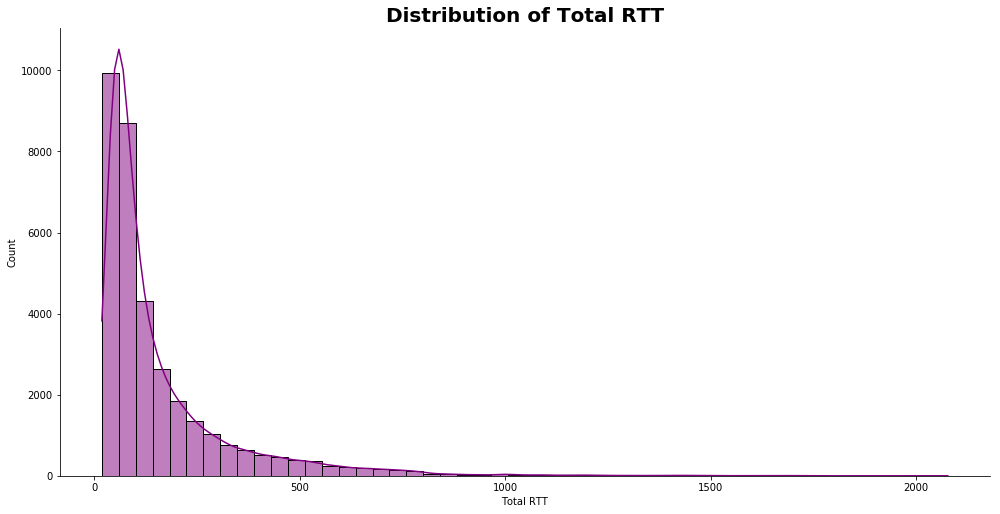

In [84]:
plot_hist(df_aggr, "Total RTT", "purple")

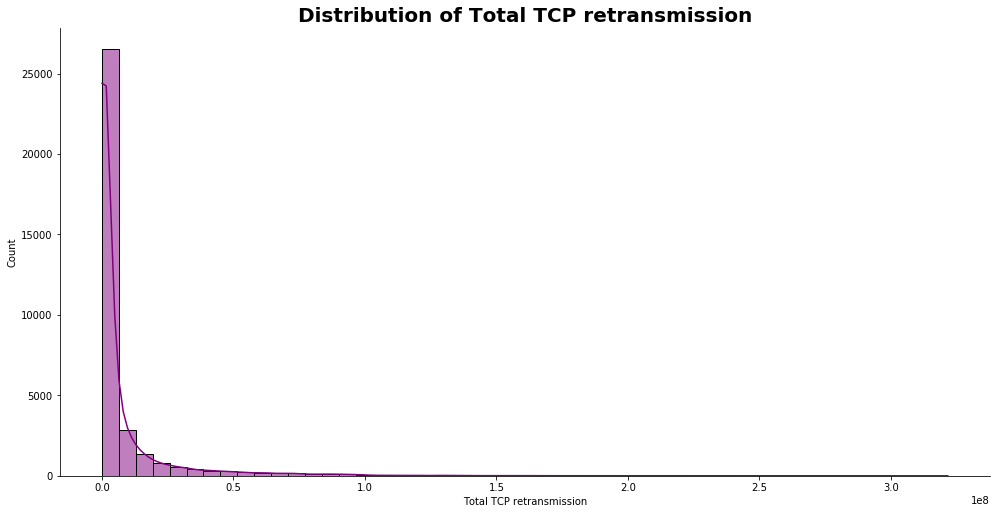

In [85]:
plot_hist(df_aggr, "Total TCP retransmission", "purple")

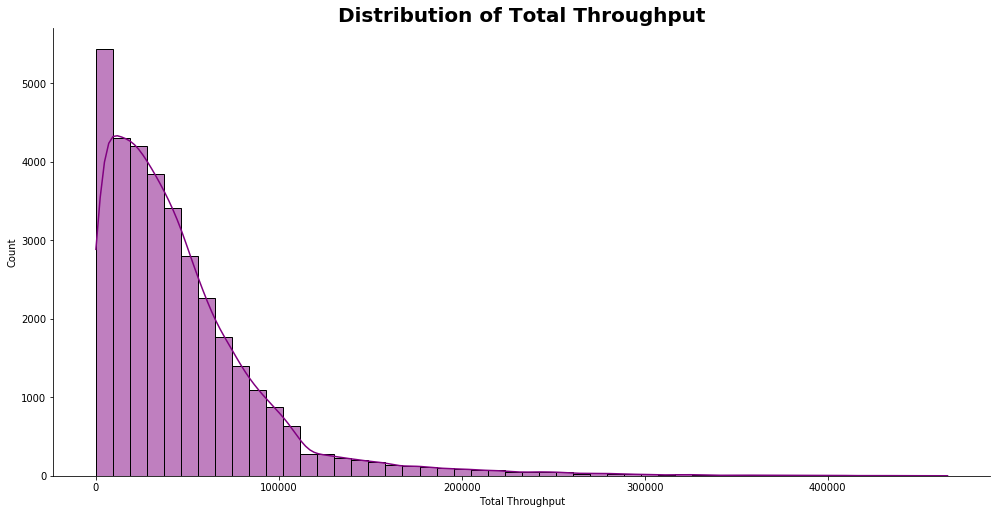

In [86]:
plot_hist(df_aggr, "Total Throughput", "purple")

In [87]:
#Top 10 customers by Total TCP retransmission
df_aggr[['Total TCP retransmission']].sort_values(by="Total TCP retransmission", ascending=False).head(10)

Total TCP retransmission
MSISDN/Number                          
33663654533              321,607,586.00
33665639832              292,942,349.00
33658832038              268,439,386.00
33661410918              253,777,985.00
33760112066              252,538,793.00
33663185785              240,023,929.00
33699309226              231,112,086.00
33667094904              224,281,443.00
33662289477              224,134,458.00
33761132554              221,052,282.00

In [88]:
#Bottom 10 customers by Total TCP retransmission
df_aggr[['Total TCP retransmission']].sort_values(by="Total TCP retransmission", ascending=True).head(10)

Total TCP retransmission
MSISDN/Number                          
33650128412                       97.00
33659400378                      108.00
33641080629                      113.00
33614777138                      128.00
33762062356                      129.00
33626357513                      134.00
33607833304                      143.00
33651768427                      175.00
33650681239                      176.00
33769636458                      176.00

In [89]:
#Top 10 customers by Total RTT
df_aggr[['Total RTT']].sort_values(by="Total RTT", ascending=False).head(10)

Total RTT
MSISDN/Number           
33699168714     2,077.00
33665695238     2,039.00
33761695062     2,030.00
33664349772     1,942.00
33665550876     1,872.00
33658990803     1,854.00
33665460548     1,743.00
33664402022     1,735.00
33665218470     1,700.00
33661876728     1,692.00

In [90]:
#Bottom 10 customers by Total RTT
df_aggr[['Total RTT']].sort_values(by="Total RTT", ascending=True).head(10)

Total RTT
MSISDN/Number           
33660613905        19.00
33675297406        20.00
33672832702        20.00
33782991971        21.00
33699853260        21.00
33663967287        21.00
33645500879        21.00
33666811177        21.00
33668708824        21.00
33760431694        21.00

In [91]:
#Top 10 customers by Total Throughput
df_aggr[['Total Throughput']].sort_values(by="Total Throughput", ascending=False).head(10)

Total Throughput
MSISDN/Number                  
33658727547          465,453.00
33699327554          445,981.00
33659546392          444,686.00
33666042685          432,768.00
33662885064          430,831.00
33658946065          428,146.00
33662227052          425,026.00
33659318332          424,760.00
33763744160          423,565.00
33650954362          416,946.00

In [92]:
#Bottom 10 customers by Total Throughput
df_aggr[['Total Throughput']].sort_values(by="Total Throughput", ascending=True).head(10)

Total Throughput
MSISDN/Number                  
33669105392               52.00
33686839010               57.00
33646320432               58.00
33650717329               59.00
33660254326               61.00
33624156971               62.00
33661417809               63.00
33761544858               66.00
33661212920               70.00
33612322026               70.00

### Average throughput per handset type

In [93]:
avg_thr = df.groupby('Handset Type')[['Total Throughput']].mean().reset_index()
avg_thr = avg_thr.sort_values(by="Total Throughput", ascending=False).head(10)
avg_thr

Handset Type  Total Throughput
498       New-Bund Technol. Mix 2        105,211.00
414                        Lg G6+        100,135.00
972     Zyxel Communicat. Sbg3600         97,351.00
803   Spa Condor Elect. Allure M2         84,311.50
754  Sony Mobile Comm. Pm-1190-Bv         82,623.00
66        Apple iPhone Xs (A2100)         80,660.00
549        Ovvi-Cellphone T. Echo         78,953.00
310                   Huawei Pele         78,381.00
223              Huawei B715S-23C         78,213.80
499        New-Bund Technol. Thor         76,974.00

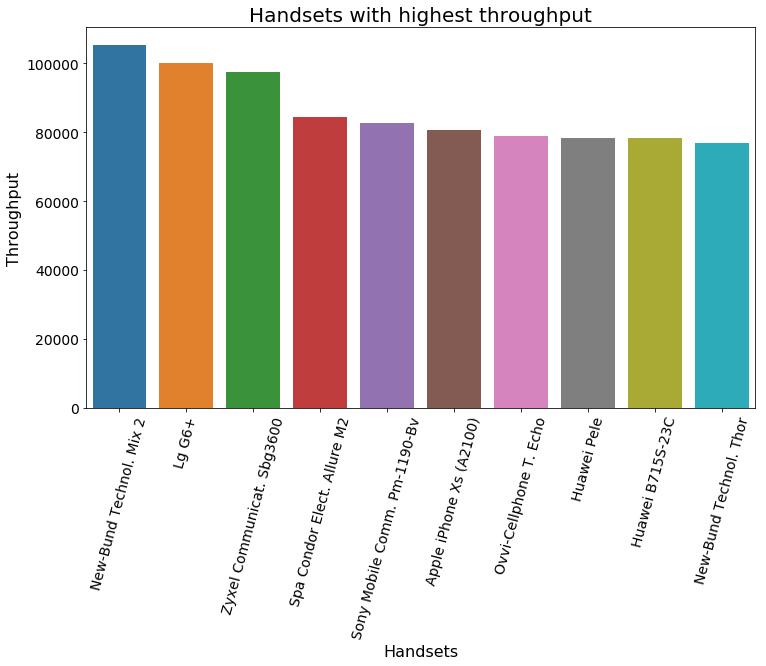

In [94]:
plot_bar(avg_thr, 'Handset Type', 'Total Throughput', 'Handsets with highest throughput', 'Handsets', 'Throughput')

### Average TCP retransmission per handset type

In [95]:
avg_tcp = df.groupby('Handset Type')[['Total TCP retransmission']].mean().reset_index()
avg_tcp = avg_tcp.sort_values(by="Total TCP retransmission", ascending=True).head(10)
avg_tcp

Handset Type  Total TCP retransmission
125          Casper Bilgisaya. Via M1                    360.00
643  Samsung Galaxy Note 8 (Sm-N9500)                    418.00
157                  Google Inc G011C                    462.00
490           Mikrotikls Sia R11E-Lte                  1,168.00
160         Gotron (Hk) Elec. Armor X                  1,500.00
393                Lenovo Moto X Play                  1,817.00
536                         Oppo A37F                  2,377.00
706                  Samsung Gt-P5220                  2,400.00
187                       Htc 2Q6E100                  2,894.00
411                             Lg G4                  3,280.00

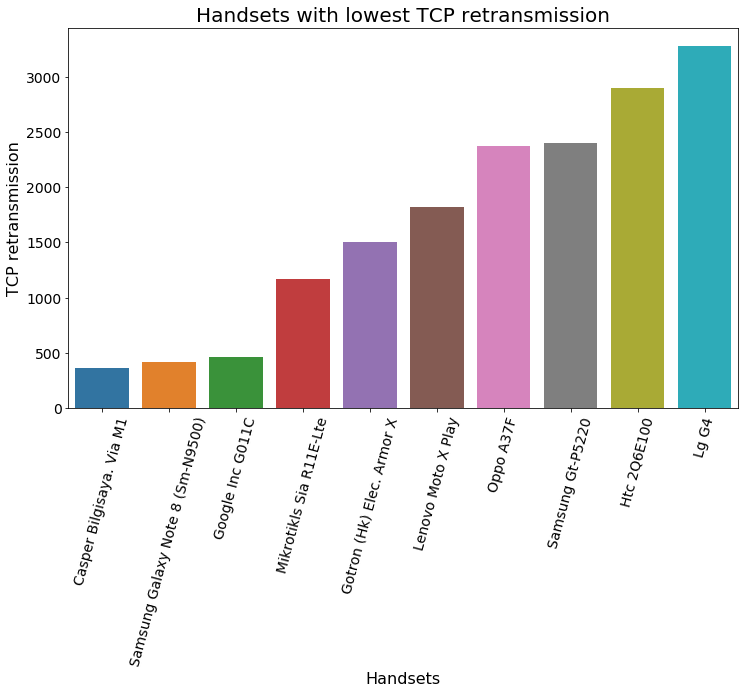

In [96]:
plot_bar(avg_tcp, 'Handset Type', 'Total TCP retransmission', 'Handsets with lowest TCP retransmission', 'Handsets', 'TCP retransmission')

### Clustering

In [97]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_aggr['Handset Type'])
df_aggr['encoded'] = le.transform(df_aggr['Handset Type'])

In [98]:
from sklearn.preprocessing import StandardScaler
x = df_aggr[['Total RTT', 'Total TCP retransmission', 'Total Throughput', 'encoded']].loc[:, :].values
x = StandardScaler().fit_transform(x)
x.shape

(34318, 4)

In [99]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(x)
df_aggr['cluster'] = kmeans.labels_

In [100]:
df_aggr.head()

Total RTT  Total TCP retransmission  Total Throughput  \
MSISDN/Number                                                          
33601008617        91.00              9,370,832.00         56,781.00   
33601011634        39.00                110,232.00         42,416.00   
33601021217       160.00             14,594,645.00         19,256.00   
33601031129        60.00              2,325,497.00         38,190.00   
33601034530       656.00              2,006,261.00          8,539.00   

                                                   Handset Type  encoded  \
MSISDN/Number                                                              
33601008617                             Apple iPhone Se (A1723)       57   
33601011634    Huawei Mate 10 Pro Porsche Design Huawei Mate 10      284   
33601021217                         Apple iPhone 7 Plus (A1784)       49   
33601031129                         Apple iPhone 8 Plus (A1897)       55   
33601034530                              Apple iPhone 7 (A1778)       46   

               cluster  
MSISDN/Number           
33601008617          0  
33601011634          0  
33601021217          0  
33601031129          0  
33601034530          0

In [101]:
df_aggr.reset_index().to_csv('../data/experience_clusters.csv', index=False)

In [102]:
df_aggr[['Total RTT', 'Total TCP retransmission', 'Total Throughput', 'encoded','cluster']].groupby('cluster').mean()

Total RTT  Total TCP retransmission  Total Throughput  encoded
cluster                                                                
0           124.88              4,584,648.90         42,207.29   145.09
1           138.62              2,301,868.32         30,592.26   662.55
2           468.17             46,230,064.95        135,101.76   232.48